#Medical Conversation Analysis
### Created by Kirat | July 2025
Notebook includes code for:
-Audio transcription and idarization
-ROUGE score evaluation
-Audio/word count histograms
-Medical summarization and keyword visualization

**Some code blocks were generated or assisted using ChatGPT**

In [ ]:
##Transcription, this section is code that transcibes a singular audio file called "conversation.mp3" which is ment to act as practice before transcribing all 273 audio files.##

In [1]:
import os
print("Current dir:", os.getcwd())
print("File exists:", os.path.exists("conversation.mp3"))

Current dir: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool
File exists: True


In [23]:
audio_file_path = "conversation.mp3"
print(os.path.exists(audio_file_path))  # This should now print True


True


In [7]:
!pip install openai

^C
  Using cached openai-1.97.1-py3-none-any.whl.metadata (29 kB)
  Using cached jiter-0.10.0-cp313-cp313-win_amd64.whl.metadata (5.3 kB)
Using cached openai-1.97.1-py3-none-any.whl (764 kB)
Using cached jiter-0.10.0-cp313-cp313-win_amd64.whl (205 kB)

   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   ---

In [8]:
%cd /content


[WinError 2] The system cannot find the file specified: '/content'
C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool


In [ ]:
!pip install openai nltk

In [ ]:
import nltk
nltk.download('punkt')


In [ ]:

from nltk.tokenize import PunktSentenceTokenizer

import openai
import nltk
import os

# Download the punkt tokenizer for sentence splitting
nltk.download('punkt', quiet=True)

# Set your OpenAI API key
openai.api_key = "YOUR_API_KEY_HERE"  # Replace with your actual API key

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def split_into_sentences(text):
    return nltk.sent_tokenize(text)
#this is the prompt that openAI will see
def classify_sentence(sentence):
    prompt = f"Classify the following sentence as either doctor's speech or patient's speech. Respond with only 'Patient:' followed by the sentence.\n\nSentence: {sentence}"
#this is the model open AI will use
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that classifies speech in medical conversations."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def process_transcription(input_file, output_file):
    # Read the transcription
    transcription = read_file(input_file)

    # Split into sentences
    from nltk.tokenize import PunktSentenceTokenizer
import nltk

# Ensure punkt is downloaded
nltk.download('punkt')

# Create a tokenizer instance
tokenizer = PunktSentenceTokenizer()

def split_into_sentences(text):
    return tokenizer.tokenize(text)


    # Classify each sentence
    classified_sentences = []
    for sentence in sentences:
        classification = classify_sentence(sentence)
        classified_sentences.append(classification)

    # Write the classified sentences to the output file
    with open(output_file, 'w', encoding='utf-8') as file:
        for sentence in classified_sentences:
            file.write(f"{sentence}\n")

# Main execution
if __name__ == "__main__":
    input_file = "transcription.txt"
    output_file = "opt.txt"

    process_transcription(input_file, output_file)

    print(f"Classification complete. Results saved in {output_file}")

In [14]:
!pip install assemblyai



   ---------------------------------------- 0/2 [websockets]
   ---------------------------------------- 0/2 [websockets]
   ---------------------------------------- 0/2 [websockets]
   -------------------- ------------------- 1/2 [assemblyai]
   -------------------- ------------------- 1/2 [assemblyai]
   ---------------------------------------- 2/2 [assemblyai]



##Diarization- This section of the code will focus on seperating the speakers into Doctor and Patient

In [19]:
audio_file = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.mp3"  # <-- Replace with your full path

# Test if Python can open the file
with open(audio_file, "rb") as f:
    print("File found and opened successfully ✅")


File found and opened successfully ✅


In [ ]:
import assemblyai as aai #this will import assemblyAI

#Set your AssemblyAI API key
aai.settings.api_key = "YOUR_ASSEMBLY_API_KEY_HERE"

# Path to the audio file you want to transcribe
audio_file = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.mp3" 

# Set up config for speaker labels
# - speaker_labels: enables diarization (labels speakers)
# - speech_model: selects the best available speech model
# - speakers_expected: tells the model to expect 2 speakers (e.g. doctor + patient)
config = aai.TranscriptionConfig(
    speaker_labels=True,
    speech_model=aai.SpeechModel.best,
    speakers_expected=2
)

# Create a transcriber instance using the above configuration
transcriber = aai.Transcriber(config=config)
# Send the audio file for transcription and diarization
transcript = transcriber.transcribe(audio_file)

# Loop through and print each utterance with its identified speaker
for utterance in transcript.utterances:
    print(f"Speaker {utterance.speaker}: {utterance.text}")

# If transcription fails, raise an error with the reason
if transcript.status == "error":
    raise RuntimeError(f"Transcription failed: {transcript.error}")

# Generate a filename for saving the transcript (same name as audio file but .txt)
base_name = os.path.splitext(os.path.basename(audio_file))[0]
output_file = f"{base_name}.txt"

# Save the transcript to a text file in UTF-8 encoding
with open (output_file, "w", encoding="utf-8") as f:
    for utterance in transcript.utterances:
        f.write(f"Speaker {utterance.speaker}: {utterance.text}\n")

# Confirm successful save and print the full path to the transcript file
print(f"Transcript saved as '{output_file}'")
print("Full path:", os.path.abspath(output_file))



In [2]:
import os
#will check if your file or transcription exists in the correct place.
expected_path = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.txt"

print("File exists? ➤", os.path.exists(expected_path))


File exists? ➤ True


In [1]:
# Import required libraries
import openai
import json
import os
from collections import defaultdict
import re
 
# Initialize the OpenAI client with your API key
# Make sure to replace this with your actual OpenAI API key or use environment variables
client = openai.OpenAI(api_key="YOUR_API_KEY")  # Replace with your key
 
# Your original transcript file (Speaker A / B)
input_file = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.txt"

# Step 1: Group all lines of dialogue by speaker (A or B)
# This helps analyze what each speaker says collectively
speaker_texts = defaultdict(list)
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        match = re.match(r"Speaker ([A-B]): (.+)", line.strip())
        if match:
            speaker_id = match.group(1)
            text = match.group(2)
            speaker_texts[speaker_id].append(text)
 
# Step 2: Build GPT prompt
prompt = (
    "This is a medical conversation between a doctor and a patient. "
    "One speaker is the doctor, the other is the patient. "
    "Based on what each speaker says, determine who is who.\n\n"
)
# Add up to 5 lines of each speaker's dialogue into the prompt

for speaker_id, texts in speaker_texts.items():
    prompt += f"Speaker {speaker_id}: {' '.join(texts[:5])}\n\n"
prompt += 'Return a JSON like {"A": "D", "B": "P"} where D = Doctor and P = Patient.'
 
# Step 3: Call OpenAI
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": prompt}],
    temperature=0
)
 
# Step 4: Extract and parse result
content = response.choices[0].message.content
role_map = json.loads(content)
 
# Step 5: Re-write the transcript with "D:" and "P:" instead of "Speaker A/B:"
# First, read the original lines again
with open(input_file, "r", encoding="utf-8") as fin:
    lines = fin.readlines()
    
 # Then overwrite the file with updated speaker labels (Doctor or Patient)

with open(input_file, "w", encoding="utf-8") as fout:
    for line in lines:
        match = re.match(r"Speaker ([A-B]): (.+)", line.strip())
        if match:
            speaker_id = match.group(1)
            text = match.group(2)
            role = role_map.get(speaker_id, f"Speaker {speaker_id}")
            fout.write(f"{role}: {text}\n")
        else:
            fout.write(line)
 # Final confirmation message
print(f"Original file '{input_file}' overwritten with roles D (Doctor) and P (Patient).")

Original file 'C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.txt' overwritten with roles D (Doctor) and P (Patient).


##ROUGE- this part of the code will focus on conversation.mp3 and compare the ROUGE score between the clean transcript, and the AI transcript to compare the accuracy of the AI transcript (transcribed transcript)

In [37]:
pip install rouge-score


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24971 sha256=63ae520aca3bfc4340d032f23003a515a6409e67bb02ebc42773af2b7e20adbe
  Stored in directory: c:\users\lucky\appdata\local\pip\cache\wheels\44\af\da\5ffc433e2786f0b1a9c6f458d5fb8f611d8eb332387f18698f
Successfully built rouge-score

   ---------------------------------------- 0/2 [absl-py]
   ---------------------------------------- 0/2 [absl-py]
   -------------------- ------------------- 1/2 [rouge-score]
   ---------------------------------------- 2/2 [rouge-score]



  DEPRECATION: Building 'rouge-score' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'rouge-score'. Discussion can be found at https://github.com/pypa/pip/issues/6334


ROUGE comparison between C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\CAR0001.txt and C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.txt:

Speaker D:
  rouge1 - Precision: 0.876, Recall: 0.888, F1: 0.882
  rougeL - Precision: 0.864, Recall: 0.877, F1: 0.870

Speaker P:
  rouge1 - Precision: 0.977, Recall: 0.955, F1: 0.966
  rougeL - Precision: 0.963, Recall: 0.941, F1: 0.952



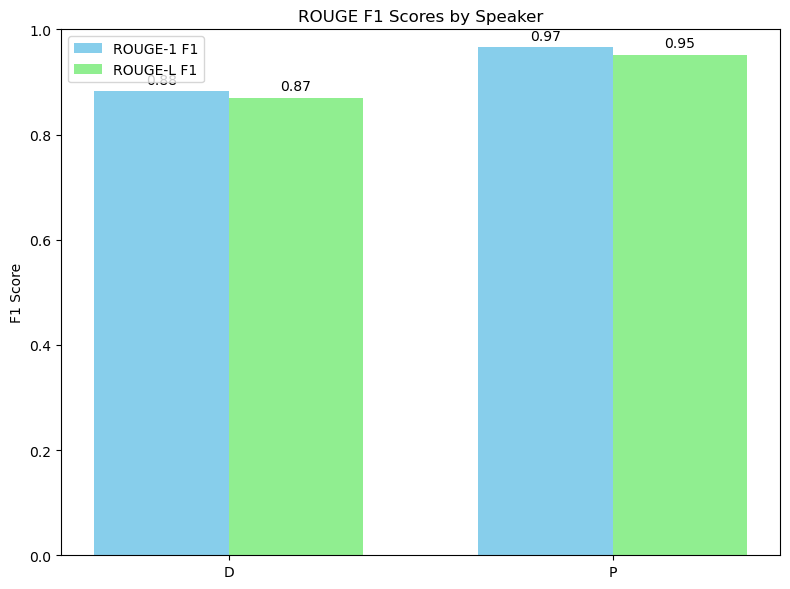

In [5]:
import os
import re
from rouge_score import rouge_scorer # Used to compute similarity metrics between text files
import matplotlib.pyplot as plt # Used for visualizing the results (bar chart)

# Function to parse transcript and group text by speaker
def parse_transcript(filepath):
    speaker_texts = {}
    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            match = re.match(r"([DP])\s*:\s*(.+)", line.strip())
            if match:
                speaker = match.group(1)
                text = match.group(2)
                if speaker not in speaker_texts:
                    speaker_texts[speaker] = []
                speaker_texts[speaker].append(text)
    return speaker_texts

# Function to concatenate multiple utterances into one text string
def concat_texts(texts):
    return " ".join(texts)
 
# Your base filename without extension
base_name = "CAR0001"
 
# Construct full file paths

# Path to gold-standard (human cleaned) transcript
file_cleaned = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\CAR0001.txt"
# Path to AI-generated transcript to evaluate
file_transcribed = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\conversation.txt"

# Parse both transcripts into dictionaries grouped by speaker
transcript_cleaned = parse_transcript(file_cleaned)
transcript_transcribed = parse_transcript(file_transcribed)

# Get list of all speakers that appear in either transcript
all_speakers = set(transcript_cleaned.keys()).union(set(transcript_transcribed.keys()))
 
# Create ROUGE scorer object (using ROUGE-1 and ROUGE-L)
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
 
# Calculate and print ROUGE scores per speaker
print(f"ROUGE comparison between {file_cleaned} and {file_transcribed}:\n")
rouge1_f1 = []
rougeL_f1 = []
speakers = []

# Loop through each speaker and calculate similarity
for speaker in all_speakers:
    text1 = concat_texts(transcript_cleaned.get(speaker, []))
    text2 = concat_texts(transcript_transcribed.get(speaker, []))
    scores = scorer.score(text1, text2)
    speakers.append(speaker)
    rouge1_f1.append(scores['rouge1'].fmeasure)
    rougeL_f1.append(scores['rougeL'].fmeasure)

       # Print detailed metrics for each speaker
    print(f"Speaker {speaker}:")
    for metric, score in scores.items():
        print(f"  {metric} - Precision: {score.precision:.3f}, Recall: {score.recall:.3f}, F1: {score.fmeasure:.3f}")
    print()

# Create bar chart to visualize F1 scores for each speaker
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(speakers))  # Number of speakers
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, rouge1_f1, width, label='ROUGE-1 F1', color='skyblue')
bar2 = ax.bar(x + width/2, rougeL_f1, width, label='ROUGE-L F1', color='lightgreen')

# Add text labels, titles, and axes
ax.set_ylabel('F1 Score')
ax.set_title('ROUGE F1 Scores by Speaker')
ax.set_xticks(x)
ax.set_xticklabels(speakers)
ax.set_ylim(0, 1)  # Scores go from 0 to 1
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()


##This section will now transcribe all 273 audio files into transcriptions and save it in a folder called "Transcribed Transcripts"

In [5]:
#transcribing multiple audio files

import assemblyai as aai  # For transcription and diarization of all files inside folder Transcribed Transcripts
import os  # For file path handling
 
# Set your API key
aai.settings.api_key = "YOUR_AAI_API_KEY"
 
# Folder paths
input_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files"
output_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)
 
# Transcription config, enables speaker diarization (will assume 2 speakers)
config = aai.TranscriptionConfig(
    speaker_labels=True,
    speech_model=aai.SpeechModel.best,
    speakers_expected=2
)
 
# Loop over all audio files in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".mp3", ".wav", ".m4a", ".flac")):
        audio_path = os.path.join(input_folder, filename)
        print(f"Transcribing: {audio_path}")
 
        # Perform transcription
        transcript = aai.Transcriber(config=config).transcribe(audio_path)
 
        # Check for errors
        if transcript.status == "error":
            print(f"❌ Transcription failed for {filename}: {transcript.error}")
            continue
 
        # Prepare output file path
        base_name = os.path.splitext(filename)[0]
        output_path = os.path.join(output_folder, f"{base_name}.txt")
 
        # Write utterances to text file
        with open(output_path, "w", encoding="utf-8") as f:
            for utterance in transcript.utterances:
                line = f"Speaker {utterance.speaker}: {utterance.text}\n"
                f.write(line)
 
        print(f"✅ Transcription saved to {output_path}")

Transcribing: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files\CAR0001.mp3
✅ Transcription saved to C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts\CAR0001.txt
Transcribing: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files\CAR0002.mp3
✅ Transcription saved to C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts\CAR0002.txt
Transcribing: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files\CAR0003.mp3
✅ Transcription saved to C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts\CAR0003.txt
Transcribing: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files\CAR0004.mp3
✅ Transcription saved to C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts\CAR0004.txt
Transcribing: C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files\CAR0005.mp3
✅ Transcription saved to C

In [7]:
import openai #Assigns D and P roles for all files inside the folder Transcribed Transcripts
import json
import os
import re
from collections import defaultdict
 
# Initialize OpenAI client
client = openai.OpenAI(api_key="YOUR_API_KEY")  # Replace with your OpenAI key
 
# Directory containing the transcript files
input_dir = "Transcribed Transcripts"
 
# Loop through all .txt files in the folder
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_dir, filename)
 
        # Step 1: Group lines by Speaker A/B
        speaker_texts = defaultdict(list)
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                match = re.match(r"Speaker ([A-B]): (.+)", line.strip())
                if match:
                    speaker_id = match.group(1)
                    text = match.group(2)
                    speaker_texts[speaker_id].append(text)
 
        if not speaker_texts:
            print(f"Skipping {filename} (no matching speaker lines found)")
            continue
 
        # Step 2: Build GPT prompt
        prompt = (
            "This is a medical conversation between a doctor and a patient. "
            "One speaker is the doctor, the other is the patient. "
            "Based on what each speaker says, determine who is who.\n\n"
        )
        for speaker_id, texts in speaker_texts.items():
            prompt += f"Speaker {speaker_id}: {' '.join(texts[:5])}\n\n"
        prompt += 'Return a JSON like {"A": "D", "B": "P"} where D = Doctor and P = Patient.'
 
        # Step 3: Call OpenAI
        try:
            response = client.chat.completions.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                temperature=0
            )
            content = response.choices[0].message.content
            role_map = json.loads(content)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
            continue
 
        # Step 4: Overwrite the file with updated roles
        with open(file_path, "r", encoding="utf-8") as fin:
            lines = fin.readlines()
 
        with open(file_path, "w", encoding="utf-8") as fout:
            for line in lines:
                match = re.match(r"Speaker ([A-B]): (.+)", line.strip())
                if match:
                    speaker_id = match.group(1)
                    text = match.group(2)
                    role = role_map.get(speaker_id, f"Speaker {speaker_id}")
                    fout.write(f"{role}: {text}\n")
                else:
                    fout.write(line)
 
        print(f"Processed and updated: {filename}")

Processed and updated: CAR0001.txt
Processed and updated: CAR0002.txt
Processed and updated: CAR0003.txt
Processed and updated: CAR0004.txt
Processed and updated: CAR0005.txt
Processed and updated: DER0001.txt
Processed and updated: GAS0001.txt
Processed and updated: GAS0002.txt
Processed and updated: GAS0003.txt
Processed and updated: GAS0004.txt
Processed and updated: GAS0005.txt
Processed and updated: GAS0007.txt
Processed and updated: GEN0001.txt
Processed and updated: MSK0001.txt
Processed and updated: MSK0003.txt
Processed and updated: MSK0004.txt
Processed and updated: MSK0005.txt
Processed and updated: MSK0006.txt
Processed and updated: MSK0007.txt
Processed and updated: MSK0008.txt
Processed and updated: MSK0009.txt
Processed and updated: MSK0010.txt
Processed and updated: MSK0011.txt
Processed and updated: MSK0012.txt
Processed and updated: MSK0013.txt
Processed and updated: MSK0014.txt
Processed and updated: MSK0015.txt
Processed and updated: MSK0016.txt
Processed and update

This section will focus on comparing the ROUGE scores between all transcribed transcripts to the clean ones through bar graphs and histograms. It will also analyse the average length and word count of the audio files and transcribed transcripts.

=== AVERAGE ROUGE SCORES ACROSS ALL FILES ===
ROUGE-1 -> Precision: 0.932, Recall: 0.895, F1: 0.913
ROUGE-L -> Precision: 0.923, Recall: 0.887, F1: 0.904

Number of files evaluated: 272


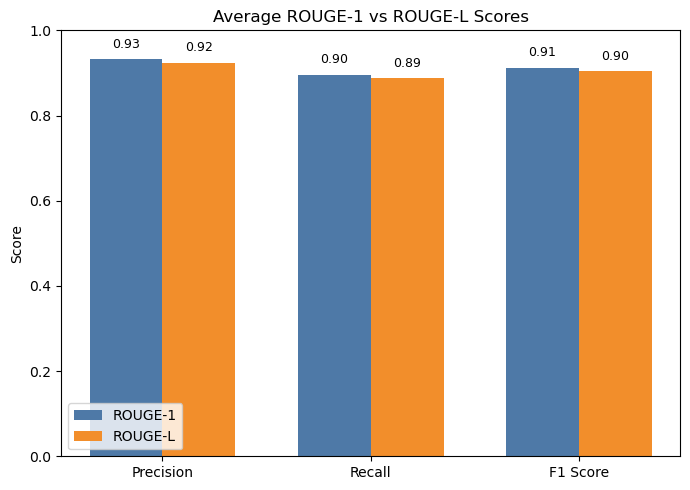

In [3]:
import os# Average ROUGE scores computed across all speakers in each matched pair of transcript files
import re
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import numpy as np


# Function to read and parse a transcript file by speaker
def parse_transcript(filepath):
    speaker_texts = {}
    encodings_to_try = ['utf-8', 'utf-16', 'latin1']

    # Try reading the file using multiple encodings    
    for enc in encodings_to_try:
        try:
            with open(filepath, "r", encoding=enc) as f:
                for line in f:
                    match = re.match(r"(\w+): (.+)", line.strip())
                    if match:
                        speaker = match.group(1)
                        text = match.group(2)
                        if speaker not in speaker_texts:
                            speaker_texts[speaker] = []
                        speaker_texts[speaker].append(text)
            return speaker_texts
        except UnicodeDecodeError:
            continue
     # Raise error if no encoding works
    raise UnicodeDecodeError(f"Could not decode file: {filepath}")
 
# Helper function to join all utterances into one string
def concat_texts(texts):
    return " ".join(texts)
 
# input folder
cleaned_dir = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Clean Transcripts"
transcribed_dir = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcribed Transcripts"
 
# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
 
# Store all scores
rouge1_precisions = []
rouge1_recalls = []
rouge1_f1s = []
 
rougeL_precisions = []
rougeL_recalls = []
rougeL_f1s = []
 
file_pairs_checked = 0
 
# Loop through files
for filename in os.listdir(cleaned_dir):
    if filename.endswith(".txt"):
        file_cleaned = os.path.join(cleaned_dir, filename)
        file_transcribed = os.path.join(transcribed_dir, filename)
 
        if not os.path.exists(file_transcribed):
            continue
 
        file_pairs_checked += 1
 
        cleaned = parse_transcript(file_cleaned)
        transcribed = parse_transcript(file_transcribed)
        all_speakers = set(cleaned.keys()).union(transcribed.keys())
 
        for speaker in all_speakers:
            ref = concat_texts(cleaned.get(speaker, []))
            hyp = concat_texts(transcribed.get(speaker, []))
            scores = scorer.score(ref, hyp)
 
            rouge1_precisions.append(scores['rouge1'].precision)
            rouge1_recalls.append(scores['rouge1'].recall)
            rouge1_f1s.append(scores['rouge1'].fmeasure)
 
            rougeL_precisions.append(scores['rougeL'].precision)
            rougeL_recalls.append(scores['rougeL'].recall)
            rougeL_f1s.append(scores['rougeL'].fmeasure)
 
# === Compute Averages ===
if rouge1_f1s:
    # ROUGE-1 averages
    avg_r1_precision = sum(rouge1_precisions) / len(rouge1_precisions)
    avg_r1_recall = sum(rouge1_recalls) / len(rouge1_recalls)
    avg_r1_f1 = sum(rouge1_f1s) / len(rouge1_f1s)
 
    # ROUGE-L averages
    avg_rL_precision = sum(rougeL_precisions) / len(rougeL_precisions)
    avg_rL_recall = sum(rougeL_recalls) / len(rougeL_recalls)
    avg_rL_f1 = sum(rougeL_f1s) / len(rougeL_f1s)
 
    # === Print Summary ===
    print("=== AVERAGE ROUGE SCORES ACROSS ALL FILES ===")
    print(f"ROUGE-1 -> Precision: {avg_r1_precision:.3f}, Recall: {avg_r1_recall:.3f}, F1: {avg_r1_f1:.3f}")
    print(f"ROUGE-L -> Precision: {avg_rL_precision:.3f}, Recall: {avg_rL_recall:.3f}, F1: {avg_rL_f1:.3f}")
    print(f"\nNumber of files evaluated: {file_pairs_checked}")
 
    # === Plot Grouped Bar Chart ===
    labels = ['Precision', 'Recall', 'F1 Score']
    r1_scores = [avg_r1_precision, avg_r1_recall, avg_r1_f1]
    rL_scores = [avg_rL_precision, avg_rL_recall, avg_rL_f1]
 
    x = np.arange(len(labels))
    width = 0.35
 
    fig, ax = plt.subplots(figsize=(7, 5))
    bars1 = ax.bar(x - width/2, r1_scores, width, label='ROUGE-1', color='#4e79a7')
    bars2 = ax.bar(x + width/2, rL_scores, width, label='ROUGE-L', color='#f28e2b')
 
    ax.set_ylabel('Score')
    ax.set_title('Average ROUGE-1 vs ROUGE-L Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.legend()
 
    # Add bar labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width()/2, height + 0.02),
                        ha='center', va='bottom', fontsize=9)
 
    plt.tight_layout()
    plt.show()
 
else:
    print("No valid transcript pairs found or no speakers detected.")

 

In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install librosa


  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)

   -------- ------------------------------- 2/9 [audioread]
   -------------------------- ------------- 6/9 [soundfile]
   ------------------------------- -------- 7/9 [pooch]
   ----------------------------------- ---- 8/9 [librosa]
   ----------------------------------- ---- 8/9 [librosa]
   ----------------------------------- ---- 8/9 [librosa]
   ---------------------------------------- 9/9 [librosa]



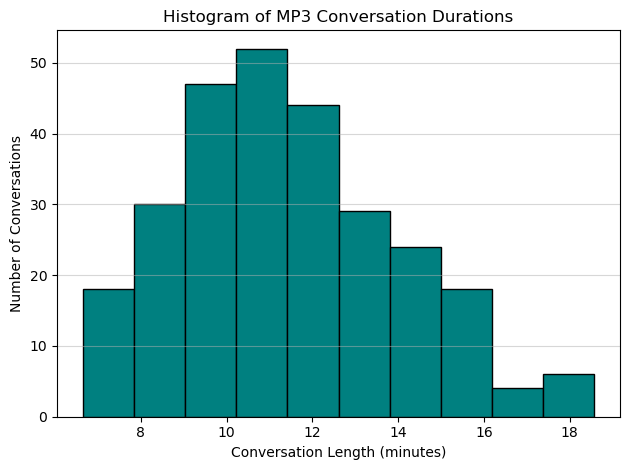

Average conversation length: 11.45 minutes


In [14]:
import os
import librosa
import matplotlib.pyplot as plt
 
# Folder containing your MP3 files
AUDIO_FOLDER = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Audio Files"
 
durations = []
 
# Loop through all MP3 files and get their duration
for file_name in os.listdir(AUDIO_FOLDER):
    if file_name.lower().endswith(".mp3"):
        file_path = os.path.join(AUDIO_FOLDER, file_name)
        try:
            duration_sec = librosa.get_duration(path=file_path)
            durations.append(duration_sec / 60)  # Convert seconds → minutes
        except Exception as e:
            print(f"Error with {file_name}: {e}")
 
# Plot histogram if we have durations
if durations:
    plt.hist(durations, bins=10, color='teal', edgecolor='black')
    plt.xlabel('Conversation Length (minutes)')
    plt.ylabel('Number of Conversations')
    plt.title('Histogram of MP3 Conversation Durations')
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()
 
    avg_duration = sum(durations) / len(durations)
    print(f"Average conversation length: {avg_duration:.2f} minutes")
else:
    print("No MP3 files found or could not read durations.")

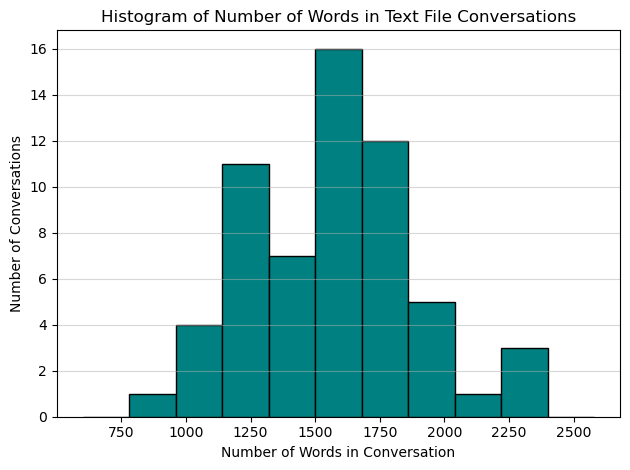

Average number of words per conversation: 1551


In [1]:
import os
import matplotlib.pyplot as plt

# Folder with clean transcripts
TRANSCRIPT_FOLDER = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Clean Transcripts"

word_counts = []

# Count words in each transcript
for file_name in os.listdir(TRANSCRIPT_FOLDER):
    if file_name.lower().endswith(".txt"):
        file_path = os.path.join(TRANSCRIPT_FOLDER, file_name)
        try:
            with open(file_path, 'r', encoding='utf-8-sig') as f:
                text = f.read()
                words = text.split()
                word_counts.append(len(words))
        except Exception as e:
            print(f"Error reading {file_name}: {e}")

# Plot histogram with manual bins
if word_counts:
    # Define custom bin edges from 600 to 2400 in steps of 180
    bins = list(range(600, 2581, 180))  # 11 edges → 10 bins


    plt.hist(word_counts, bins=bins, color='teal', edgecolor='black')
    plt.xlabel('Number of Words in Conversation')
    plt.ylabel('Number of Conversations')
    plt.title('Histogram of Number of Words in Text File Conversations')
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

    avg_words = sum(word_counts) / len(word_counts)
    print(f"Average number of words per conversation: {avg_words:.0f}")
else:
    print("No transcript files found or could not read word counts.")


In [4]:
# Imports and OpenAI setup
from openai import OpenAI
import os

# Replace this with your actual OpenAI API key
client = OpenAI(api_key="YOUR_API_KEY")  # Or use os.environ["OPENAI_API_KEY"] if stored as env variable


# Safely load the file (use raw string r"" or double backslashes for Windows paths)
with open(r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\CAR0001.txt", "r", encoding="utf-8") as f:
    transcript = f.read()


system_prompt = (
    "You are a medical assistant helping to generate SOAP notes "
    "(Subjective, Objective, Assessment, Plan) based on doctor-patient transcripts."
)

user_prompt = f"""
Based on the following transcript between a doctor (D) and a patient (P), generate a SOAP note in full detail.

Transcript:
{transcript}
"""

# Call GPT-4 to generate SOAP note

response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=0.5
)

# Extract the content (SOAP note)
soap_note = response.choices[0].message.content

# Show the result
print(soap_note)

# Save to a new file
with open(r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\CAR0001_SOAP.txt", "w", encoding="utf-8") as out_file:
    out_file.write(soap_note)


SOAP Note:

Subjective:
The patient is a 39-year-old male who presents with a chief complaint of chest pain that started last night and has been constant since then. He describes the pain as sharp and located on the left side of his chest. The pain seems to worsen when he lies down and when he takes deep breaths. The severity of the pain is rated at a 7 or 8 on a scale of 1 to 10. Along with the chest pain, the patient also reports feeling lightheaded and having trouble breathing. He has noticed some swelling on his neck but denies any pain. The patient denies any recent trauma, immobilization, or infectious symptoms. He has no known allergies and takes no regular medications. He is a smoker, consuming about a pack a day for the past 10-15 years, and occasionally uses cannabis. He also drinks alcohol, averaging about 10 drinks per week. The patient lives alone and works as an accountant. His father had a heart attack at the age of 45 and had cholesterol problems.

Objective:
The patien

In [ ]:
!pip install scispacy


In [9]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz



     ---------------------------------------- 0.0/538.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/538.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/538.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/538.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/538.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/538.1 MB ? eta -:--:--
     -------------------------------------- 0.5/538.1 MB 507.8 kB/s eta 0:17:39
     -------------------------------------- 0.5/538.1 MB 507.8 kB/s eta 0:17:39
     -------------------------------------- 0.8/538.1 MB 509.8 kB/s eta 0:17:35
     -------------------------------------- 0.8/538.1 MB 509.8 kB/s eta 0:17:35
     -------------------------------------- 0.8/538.1 MB 509.8 kB/s eta 0:17:35
     -------------------------------------- 1.0/538.1 MB 501.9 kB/s eta 0:17:51
     -------------------------------------- 1.0/538.1 MB 501.9 kB/s eta 0:17:51
 

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [105 lines of output]
    Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
    Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
    Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl.metadata (8.8 kB)
    Using cached preshed-3.0.10-cp313-cp313-win_amd64.whl.metadata (2.5 kB)
    Using cached murmurhash-1.0.13-cp313-cp313-win_amd64.whl.metadata (2.2 kB)
    Installing build dependencies: started
    Installing build dependencies: still running...
    Installing build dependencies: finished with status 'error'
    error: subprocess-exited-with-error
  
    pip subprocess to install build dependencies did not run successfully.
    exit code: 1
  
    [73 lines of output]
      Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
      Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
      U

     ----- ------------------------------- 85.2/538.1 MB 645.0 kB/s eta 0:11:43
     ----- ------------------------------- 85.5/538.1 MB 650.6 kB/s eta 0:11:36
     ----- ------------------------------- 85.5/538.1 MB 650.6 kB/s eta 0:11:36
     ----- ------------------------------- 85.5/538.1 MB 650.6 kB/s eta 0:11:36
     ----- ------------------------------- 85.7/538.1 MB 647.9 kB/s eta 0:11:39
     ----- ------------------------------- 85.7/538.1 MB 647.9 kB/s eta 0:11:39
     ----- ------------------------------- 86.0/538.1 MB 653.1 kB/s eta 0:11:33
     ----- ------------------------------- 86.2/538.1 MB 664.9 kB/s eta 0:11:20
     ----- ------------------------------- 86.2/538.1 MB 664.9 kB/s eta 0:11:20
     ----- ------------------------------- 86.5/538.1 MB 664.7 kB/s eta 0:11:20
     ----- ------------------------------- 86.5/538.1 MB 664.7 kB/s eta 0:11:20
     ----- ------------------------------- 86.8/538.1 MB 674.1 kB/s eta 0:11:10
     ----- -----------------------------

In [6]:
import openai
from pathlib import Path
from openai import OpenAI

# Initialize OpenAI client with your API key
client = OpenAI(api_key="YOUR_API_KEY")  

# Load the cleaned transcript file
file_path = Path("C:/Users/lucky/Documents/Medical-Conversation-Analysis-Tool/CAR0001.txt")
with file_path.open("r", encoding="utf-8") as f:
    transcript = f.read()

# System and user prompts
system_prompt = "You are a medical assistant skilled in extracting diseases and illnesses mentioned in patient-doctor transcripts."

user_prompt = f"""
Extract a list of **diseases and illnesses** mentioned in the following transcript between a doctor and a patient. 
Just list the disease names as bullet points. 


Transcript:
{transcript}
"""

# Call GPT-4 API
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=0.3
)

# Print extracted diseases/illnesses
illnesses = response.choices[0].message.content
print(illnesses)


The transcript does not mention any specific diseases or illnesses by name. However, the patient's symptoms suggest potential conditions such as:

- Chest Pain
- Difficulty Breathing
- Lightheadedness
- Heart Palpitations
- Swollen Neck



In [13]:
import os
import openai

# Set your API key (make sure this is securely stored in production)
openai.api_key = "YOUR_API_KEY"

# Folder paths
input_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Fixed Transcripts"
output_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Extracted Transcripts"

# Make output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all .txt files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_folder, filename)

        with open(file_path, "r", encoding="utf-8") as f:
            transcript = f.read()

        # SYSTEM PROMPT
        system_prompt = (
            "You are a medical assistant trained in analyzing doctor-patient conversations. "
            "You will extract relevant information including symptoms, possible illnesses, and generate a SOAP note."
        )

        # USER PROMPT
        user_prompt = f"""
Analyze the following transcript between a doctor and a patient. Your output should include:

1. **List of symptoms** mentioned (bullet points).
2. **List of possible diseases or illnesses** based on context (bullet points — even if uncertain, make a reasonable guess).
3. **SOAP note** (Subjective, Objective, Assessment, Plan format) for the case.

Transcript:
{transcript}
"""

        # OpenAI API call
        try:
            response = openai.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_prompt}
                ],
                temperature=0.5
            )

            result = response.choices[0].message.content.strip()

            # Write output to file
            output_file = os.path.join(output_folder, f"{filename[:-4]}_analysis.txt")
            with open(output_file, "w", encoding="utf-8") as out_f:
                out_f.write(result)

            print(f"✅ Processed: {filename}")

        except Exception as e:
            print(f"❌ Failed on {filename}: {e}")


✅ Processed: RES0002.txt
✅ Processed: RES0003.txt
✅ Processed: RES0004.txt
✅ Processed: RES0005.txt
✅ Processed: RES0006.txt
✅ Processed: RES0007.txt
✅ Processed: RES0008.txt
✅ Processed: RES0009.txt
✅ Processed: RES0010.txt
✅ Processed: RES0011.txt
✅ Processed: RES0012.txt
✅ Processed: RES0013.txt
✅ Processed: RES0014.txt
✅ Processed: RES0015.txt
✅ Processed: RES0016.txt
✅ Processed: RES0017.txt
✅ Processed: RES0018.txt
✅ Processed: RES0019.txt
✅ Processed: RES0020.txt
✅ Processed: RES0021.txt
✅ Processed: RES0022.txt
✅ Processed: RES0023.txt
✅ Processed: RES0024.txt
✅ Processed: RES0025.txt
✅ Processed: RES0026.txt
✅ Processed: RES0027.txt
✅ Processed: RES0028.txt
✅ Processed: RES0029.txt
✅ Processed: RES0030.txt
✅ Processed: RES0031.txt
✅ Processed: RES0032.txt
✅ Processed: RES0033.txt
✅ Processed: RES0034.txt
✅ Processed: RES0035.txt
✅ Processed: RES0036.txt
✅ Processed: RES0037.txt
✅ Processed: RES0038.txt
✅ Processed: RES0039.txt
✅ Processed: RES0042.txt
✅ Processed: RES0043.txt


In [11]:
import os
import chardet

input_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Transcript C"
output_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Fixed Transcripts"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_folder, filename)
        fixed_path = os.path.join(output_folder, filename)

        try:
            # Read raw bytes to detect encoding
            with open(file_path, 'rb') as f:
                raw_data = f.read()
                result = chardet.detect(raw_data)
                encoding = result['encoding']
                if encoding is None:
                    print(f"❌ Could not detect encoding for {filename}")
                    continue

            # Decode using detected encoding and re-save as UTF-8
            text = raw_data.decode(encoding)
            with open(fixed_path, 'w', encoding='utf-8') as f:
                f.write(text)

            print(f"✅ Converted to UTF-8: {filename} (from {encoding})")

        except Exception as e:
            print(f"❌ Failed to convert {filename}: {e}")


✅ Converted to UTF-8: RES0002.txt (from UTF-16)
✅ Converted to UTF-8: RES0003.txt (from ascii)
✅ Converted to UTF-8: RES0004.txt (from ascii)
✅ Converted to UTF-8: RES0005.txt (from ascii)
✅ Converted to UTF-8: RES0006.txt (from ascii)
✅ Converted to UTF-8: RES0007.txt (from ascii)
✅ Converted to UTF-8: RES0008.txt (from ascii)
✅ Converted to UTF-8: RES0009.txt (from ascii)
✅ Converted to UTF-8: RES0010.txt (from ascii)
✅ Converted to UTF-8: RES0011.txt (from ascii)
✅ Converted to UTF-8: RES0012.txt (from ascii)
✅ Converted to UTF-8: RES0013.txt (from ascii)
✅ Converted to UTF-8: RES0014.txt (from ascii)
✅ Converted to UTF-8: RES0015.txt (from ascii)
✅ Converted to UTF-8: RES0016.txt (from ascii)
✅ Converted to UTF-8: RES0017.txt (from ascii)
✅ Converted to UTF-8: RES0018.txt (from ascii)
✅ Converted to UTF-8: RES0019.txt (from ascii)
✅ Converted to UTF-8: RES0020.txt (from ascii)
✅ Converted to UTF-8: RES0021.txt (from ascii)
✅ Converted to UTF-8: RES0022.txt (from ascii)
✅ Converted 

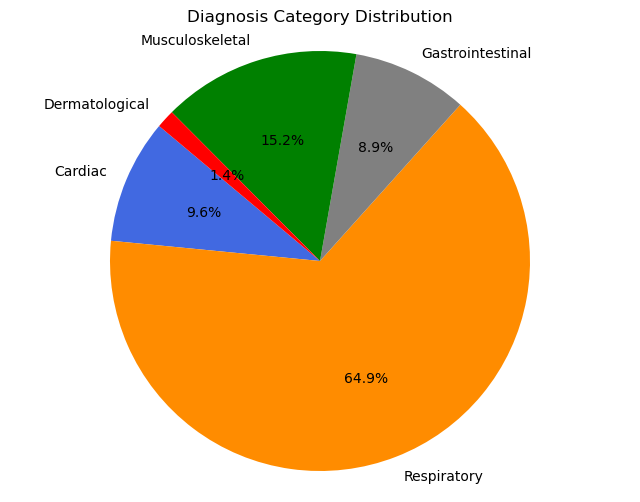

In [14]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter

# Path to folder with the AI-generated SOAP notes
analysis_folder = r"C:\Users\lucky\Documents\Medical-Conversation-Analysis-Tool\Extracted Transcripts"

# Define keywords for each diagnosis category
diagnosis_keywords = {
    "Respiratory": ["cough", "asthma", "shortness of breath", "wheezing", "bronchitis", "respiratory", "sinusitis", "pneumonia", "cold", "flu", "chest pain (breathing)", "runny nose"],
    "Musculoskeletal": ["back pain", "knee pain", "joint pain", "arthritis", "muscle", "sprain", "bone", "injury", "sciatica", "tendon", "fracture"],
    "Gastrointestinal": ["abdominal pain", "nausea", "vomiting", "constipation", "diarrhea", "acid reflux", "gas", "bloating", "stomach", "gastrointestinal", "IBS"],
    "Dermatological": ["rash", "itching", "eczema", "acne", "psoriasis", "hives", "dermatitis", "skin"],
    "Cardiac": ["chest pain", "palpitations", "hypertension", "heart", "cardiac", "arrhythmia", "blood pressure"]
}

# Normalize keyword list for easier matching
diagnosis_keywords = {k: [kw.lower() for kw in v] for k, v in diagnosis_keywords.items()}

# Initialize counter
category_counter = Counter()

# Loop through all analysis files
for filename in os.listdir(analysis_folder):
    if filename.endswith("_analysis.txt"):
        file_path = os.path.join(analysis_folder, filename)

        with open(file_path, "r", encoding="utf-8") as f:
            content = f.read().lower()  # Lowercase for easier keyword matching

            # Look for diagnosis section using pattern
            match = re.search(r"possible diseases.*?:\s*(.*?)\n\n", content, re.DOTALL)
            if match:
                diagnoses_section = match.group(1)
            else:
                diagnoses_section = content  # fallback: search whole text

            # Match keywords to categories
            matched_categories = set()
            for category, keywords in diagnosis_keywords.items():
                for kw in keywords:
                    if kw in diagnoses_section:
                        matched_categories.add(category)
                        break  # only count once per category

            # If none matched, you can skip or categorize as "Other"
            for cat in matched_categories:
                category_counter[cat] += 1

# Prepare pie chart
labels = list(category_counter.keys())
sizes = [category_counter[label] for label in labels]
colors = ["royalblue", "darkorange", "grey", "green", "red"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Diagnosis Category Distribution")
plt.show()


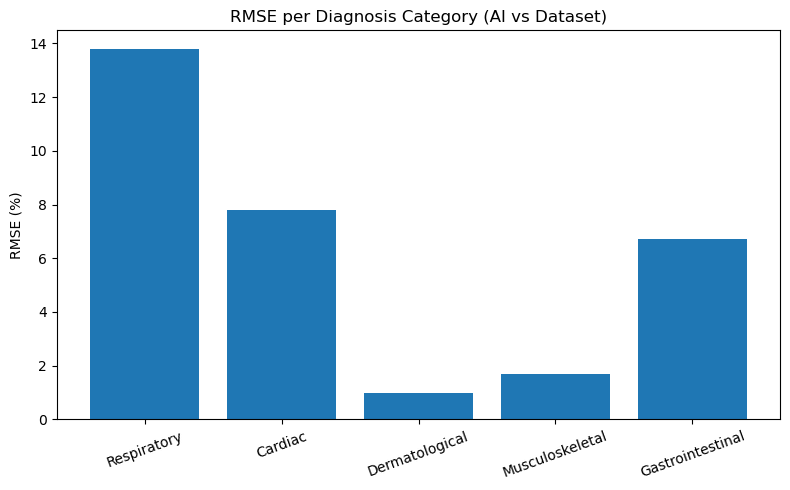

In [1]:
import matplotlib.pyplot as plt

categories = ["Respiratory", "Cardiac", "Dermatological", "Musculoskeletal", "Gastrointestinal"]
rmse_values = [13.8, 7.8, 1.0, 1.7, 6.7]

plt.figure(figsize=(8, 5))
plt.bar(categories, rmse_values)
plt.title("RMSE per Diagnosis Category (AI vs Dataset)")
plt.ylabel("RMSE (%)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
